In [1]:
import time, array, random, copy, math, six, itertools
import numpy as np
import pandas as pd

import sys

# hacky path usage
sys.path.append('../lint_rules')
sys.path.append('../')
from vis_lint import vis_lint

import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as a3
from matplotlib.path import Path
from matplotlib import animation, patches
from IPython.display import HTML
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

markers = ['o', '^', 's', 'D', 'v', 'h', 'p']

In [2]:
def print_methods(input_obj):
    print('\n'.join([x for x in dir(input_obj)]))

In [3]:
car_data = pd.read_csv('data/vehicules-commercialises.csv.gz', sep=';')
last_year = sorted(car_data.Année)[-1]
car_data = car_data[car_data.Année == last_year]
car_data = car_data[car_data.Carburant == 'Essence']

In [4]:
colors = [(0.8941176470588236, 0.10196078431372549, 0.10980392156862745), (0.21568627450980393, 0.49411764705882355, 0.7215686274509804), (0.30196078431372547, 0.6862745098039216, 0.2901960784313726), (0.596078431372549, 0.3058823529411765, 0.6392156862745098), (1.0, 0.4980392156862745, 0.0), (1.0, 1.0, 0.2), (0.6509803921568628, 0.33725490196078434, 0.1568627450980392)]

[('require-axes', 'Axes must be labeled'), ('no-indistinguishable-series', 'Series must be distinguishable'), ('only-data-driven-visuals', 'The order the of the points is not significant'), ('max-colors', 'Too many colors')]


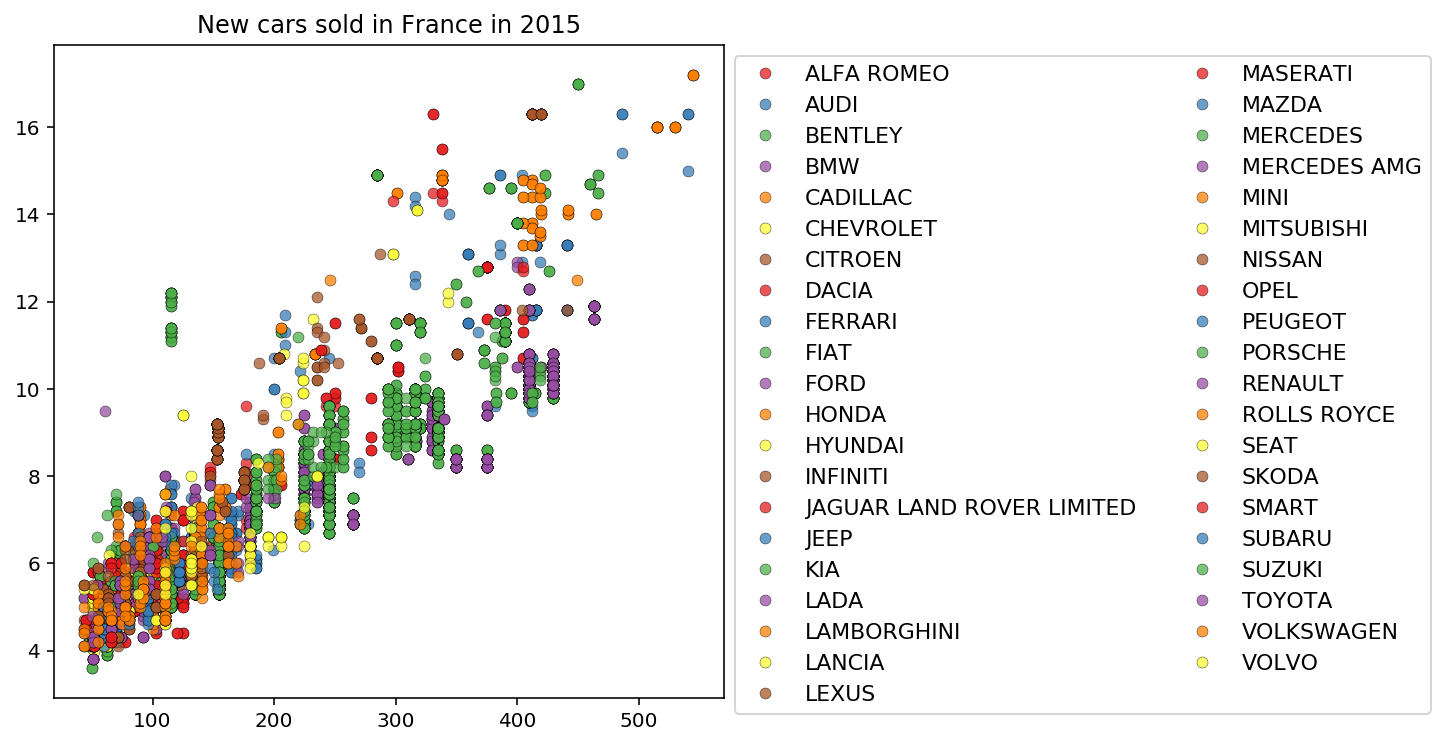

In [5]:
df = car_data
group_by = 'Marque'

df = df.drop_duplicates()
max_colors = 7
fig, ax = plt.subplots(figsize=(6, 6))
for i, (maker, group) in enumerate(df.groupby(group_by)):
    ax.plot(group['Puissance maximale'], group['Consommation mixte'],
            marker='o', color=colors[i % max_colors],
            linestyle='', ms=5.5, alpha=0.74, label=maker, markeredgecolor='k', markeredgewidth=0.25)
plt.legend(ncol=2, numpoints=1, bbox_to_anchor=(
    1., 1.), fontsize=11, frameon=True)
plt.axis('on')


# plt.xlabel('Maximum power ($\mathrm{kW}$)')
# plt.ylabel('Consumption ($\ell/100\,\mathrm{km}$)')
plt.title('New cars sold in France in {0}'.format(last_year))

print(vis_lint(ax, plt, {"only-data-driven-visuals": 0.01}))
